# DC HOUSING INVENTORY 

### Technique: Keras Regression

### Objective: The DC Residential Properties data set lists 158,957 housing units built between 1754 and 2018. I seek to predict sale price using a regression model that incorporates deep neural networks.   

#### Features: 

* INDEX - Unique identifier for each residential property
* BATHRM - Number of Full Bathrooms
* HF_BATHRM - Number of Half Bathrooms (no bathtub or shower)
* HEAT - Heating System Type
* AC - Cooling System 
* NUM_UNITS - Number of Units
* ROOMS - Number of Rooms
* BEDRM - Number of Bedrooms
* AYB - Year the main portion of the building was built
* YR_RMDL - Year the structure was remodeled
* EYB - Year an improvement was built 
* STORIES - Number of stories in primary dwelling
* SALEDATE - Date of most recent sale
* PRICE - Price at most recent sale
* QUALIFIED - Qualified (binary assignment of 'U' or 'Q')
* SALE_NUM - Number of times sold
* GBA - Gross building area in square feet
* BLDG_NUM - Building Number on Property
* STYLE - Style type
* STRUCTS - Structure type
* GRADE - Description of quality 
* CNDTN - Description of condition
* EXTWALL - Extrerior wall type
* ROOF - Roof type
* INTWALL - Interior wall type
* KITCHENS - Number of kitchens
* FIREPLACES - Number of fireplaces
* USECODE - Property use code
* LANDAREA - Land area of property in square feet
* GIS_LAST_MOD_DTTM - Last Modified Date
* SOURCE - Raw Data Source (Residential or Condo)
* CMPLX_NUM - Complex number
* LIVING_GBA - Gross building area in square feet
* FULLADDRESS - Street Address
* CITY - City
* STATE - State
* ZIPCODE - Zip Code
* NATIONALGRID - National grid coordinate spatial address
* LATITUDE - Latitude
* LONGITUDE - Longitude
* ASSESSMENT_NBHD - Neighborhood ID
* ASSESSMENT_SUBNBHD - Subneighborhood ID
* CENSUS_TRACT - Census tract
* CENSUS_BLOCK - Census block
* WARD - Ward (8 districts in the city with changing boudaries)
* SQUARE - Square (location)
* X - Longitude
* Y - Latitude
* QUADRANT - City quadrant (NE,SE,SW,NW)

In [703]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set_palette("husl")
sns.set(style="darkgrid")
%matplotlib inline


In [487]:
df = pd.read_csv('DC_Properties.csv')

## Data Preprocessing

In [488]:
df.shape

(158957, 49)

In [489]:
df.head()

,INDEX,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [490]:
df.columns

Index(['INDEX', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [491]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INDEX,158957.0,79478.000000,4.588708e+04,0.000000,39739.000000,79478.000000,119217.000000,1.589560e+05
BATHRM,158957.0,1.810678,9.763960e-01,0.000000,1.000000,2.000000,2.000000,1.400000e+01
HF_BATHRM,158957.0,0.458237,5.875715e-01,0.000000,0.000000,0.000000,1.000000,1.100000e+01
NUM_UNITS,106696.0,1.198039,5.969244e-01,0.000000,1.000000,1.000000,1.000000,6.000000e+00
ROOMS,158957.0,6.187736,2.618165e+00,0.000000,4.000000,6.000000,7.000000,4.800000e+01
BEDRM,158957.0,2.732506,1.358864e+00,0.000000,2.000000,3.000000,3.000000,2.400000e+01
AYB,158686.0,1941.987579,3.364023e+01,1754.000000,1918.000000,1937.000000,1960.000000,2.019000e+03
YR_RMDL,80928.0,1998.243537,1.657579e+01,20.000000,1985.000000,2004.000000,2010.000000,2.019000e+03
EYB,158957.0,1963.718024,2.492315e+01,1800.000000,1954.000000,1963.000000,1975.000000,2.018000e+03
STORIES,106652.0,2.129243,2.938934e+00,0.000000,2.000000,2.000000,2.000000,8.260000e+02


### Missing Values

This data set is an inventory of ALL residential properties in Washinton D.C. In order to predict sale price, we need the subset of properties that have been sold. 

In [492]:
df.dropna(how='any', subset=['PRICE'], inplace=True)

In [493]:
df.shape

(98216, 49)

Dropping observations with missing values in the 'PRICE' column leaves us with just over 98,000 records. We want to preserve as many of these as possible. The next step is to examine the profile of missing values in the rest of the data set. 

In [494]:
df.isnull().sum()

INDEX                     0
BATHRM                    0
HF_BATHRM                 0
HEAT                      0
AC                        0
NUM_UNITS             40316
ROOMS                     0
BEDRM                     0
AYB                     112
YR_RMDL               40542
EYB                       0
STORIES               40349
SALEDATE                  1
PRICE                     0
QUALIFIED                 0
SALE_NUM                  0
GBA                   40316
BLDG_NUM                  0
STYLE                 40316
STRUCT                40316
GRADE                 40316
CNDTN                 40316
EXTWALL               40316
ROOF                  40316
INTWALL               40316
KITCHENS              40317
FIREPLACES                0
USECODE                   0
LANDAREA                  0
GIS_LAST_MOD_DTTM         0
SOURCE                    0
CMPLX_NUM             57900
LIVING_GBA            57900
FULLADDRESS           40651
CITY                  40647
STATE               

While many of the features have few or no missing values, a number of features that I think could strengthen the model (STYLE, STRUCTURE, GRADE, CONDITION etc) have more than 40,000 missing values. I can tell that most missing values come from the same set of observations because the number of missing values is 40,316 for ten potential explanatory variables. At this point I'm thinking of two stratgies. I could remove the rows with missing values and train the model on a much smaller data set, or I could ignore the columns with more than > 20% of their values missing and minimize data loss. I will try both approaches, but first I need to remove columns that I do not intend to include in any models. 

In [495]:
df = df.drop('BLDG_NUM',axis=1)
df = df.drop('INDEX',axis=1)
df = df.drop('USECODE',axis=1)
df = df.drop('GIS_LAST_MOD_DTTM',axis=1)
df = df.drop('CMPLX_NUM',axis=1)
df = df.drop('LIVING_GBA',axis=1)
df = df.drop('FULLADDRESS',axis=1)
df = df.drop('CITY',axis=1)
df = df.drop('STATE',axis=1)
df = df.drop('ZIPCODE',axis=1)
df = df.drop('NATIONALGRID',axis=1)
df = df.drop('ASSESSMENT_SUBNBHD',axis=1)
df = df.drop('CENSUS_TRACT',axis=1)
df = df.drop('CENSUS_BLOCK',axis=1)
df = df.drop('SQUARE',axis=1)
df = df.drop('Y',axis=1)
df = df.drop('X',axis=1)

In [496]:
df.isnull().sum()

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
NUM_UNITS          40316
ROOMS                  0
BEDRM                  0
AYB                  112
YR_RMDL            40542
EYB                    0
STORIES            40349
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
GBA                40316
STYLE              40316
STRUCT             40316
GRADE              40316
CNDTN              40316
EXTWALL            40316
ROOF               40316
INTWALL            40316
KITCHENS           40317
FIREPLACES             0
LANDAREA               0
SOURCE                 0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
WARD                   0
QUADRANT             101
dtype: int64

We are still left with a large number of features. This is a good time to pursue the two approaches I outlined above. In the first instance, I will remove all columns with a large number of missing values and try to preserve as many observations as possible. 

### The First Approach

In [497]:
df = df.drop('NUM_UNITS',axis=1)
df = df.drop('STORIES',axis=1)
df = df.drop('GBA',axis=1)
df = df.drop('STYLE',axis=1)
df = df.drop('STRUCT',axis=1)
df = df.drop('GRADE',axis=1)
df = df.drop('CNDTN',axis=1)
df = df.drop('EXTWALL',axis=1)
df = df.drop('ROOF',axis=1)
df = df.drop('INTWALL',axis=1)
df = df.drop('KITCHENS',axis=1)

In [498]:
df.isnull().sum()

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
ROOMS                  0
BEDRM                  0
AYB                  112
YR_RMDL            40542
EYB                    0
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
FIREPLACES             0
LANDAREA               0
SOURCE                 0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
WARD                   0
QUADRANT             101
dtype: int64

YR_RMDL has 40,542 missing values but we can assume that a missing value indicates that the property has not been remodeled. In this case, we should turn this into a binary category of remodeled (1) or not remodeled (0). 

In [499]:
df['YR_RMDL'].fillna(0, inplace=True)

In [500]:
df['YR_RMDL'].loc[(df['YR_RMDL'] > 0)] = 1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [501]:
df['YR_RMDL'].value_counts()

1.0    57674
0.0    40542
Name: YR_RMDL, dtype: int64

Three other columns have missing values. AYB: YEAR BUILT (112), QUADRANT (101) & SALEDATE (!). Since each set of missing values represents less than 0.1% of total observations I am comfortable removing them from the data set. Imputation would not be appropriate for these features. 

In [502]:
df.dropna(how='any', subset=['AYB'], inplace=True)

In [503]:
df.dropna(how='any', subset=['QUADRANT'], inplace=True)

In [504]:
df.dropna(how='any', subset=['SALEDATE'], inplace=True)

In [505]:
df.isnull().sum()

BATHRM             0
HF_BATHRM          0
HEAT               0
AC                 0
ROOMS              0
BEDRM              0
AYB                0
YR_RMDL            0
EYB                0
SALEDATE           0
PRICE              0
QUALIFIED          0
SALE_NUM           0
FIREPLACES         0
LANDAREA           0
SOURCE             0
LATITUDE           0
LONGITUDE          0
ASSESSMENT_NBHD    0
WARD               0
QUADRANT           0
dtype: int64

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98002 entries, 0 to 158955
Data columns (total 21 columns):
BATHRM             98002 non-null int64
HF_BATHRM          98002 non-null int64
HEAT               98002 non-null object
AC                 98002 non-null object
ROOMS              98002 non-null int64
BEDRM              98002 non-null int64
AYB                98002 non-null float64
YR_RMDL            98002 non-null float64
EYB                98002 non-null int64
SALEDATE           98002 non-null object
PRICE              98002 non-null float64
QUALIFIED          98002 non-null object
SALE_NUM           98002 non-null int64
FIREPLACES         98002 non-null int64
LANDAREA           98002 non-null int64
SOURCE             98002 non-null object
LATITUDE           98002 non-null float64
LONGITUDE          98002 non-null float64
ASSESSMENT_NBHD    98002 non-null object
WARD               98002 non-null object
QUADRANT           98002 non-null object
dtypes: float64(5), int64(8), ob

### Encode Categorical Variables

In [507]:
df['HEAT'] = df['HEAT'].astype('category')
df['AC'] = df['AC'].astype('category') 
df['QUALIFIED'] = df['QUALIFIED'].astype('category')
df['SOURCE'] = df['SOURCE'].astype('category')  
df['ASSESSMENT_NBHD'] = df['ASSESSMENT_NBHD'].astype('category')
df['WARD'] = df['WARD'].astype('category')  
df['QUADRANT'] = df['QUADRANT'].astype('category')

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98002 entries, 0 to 158955
Data columns (total 21 columns):
BATHRM             98002 non-null int64
HF_BATHRM          98002 non-null int64
HEAT               98002 non-null category
AC                 98002 non-null category
ROOMS              98002 non-null int64
BEDRM              98002 non-null int64
AYB                98002 non-null float64
YR_RMDL            98002 non-null float64
EYB                98002 non-null int64
SALEDATE           98002 non-null object
PRICE              98002 non-null float64
QUALIFIED          98002 non-null category
SALE_NUM           98002 non-null int64
FIREPLACES         98002 non-null int64
LANDAREA           98002 non-null int64
SOURCE             98002 non-null category
LATITUDE           98002 non-null float64
LONGITUDE          98002 non-null float64
ASSESSMENT_NBHD    98002 non-null category
WARD               98002 non-null category
QUADRANT           98002 non-null category
dtypes: category(7

In [509]:
df['HEAT'].value_counts()

Forced Air        39332
Hot Water Rad     22778
Warm Cool         17315
Ht Pump           16845
Wall Furnace        706
Water Base Brd      272
Elec Base Brd       249
No Data             209
Electric Rad         93
Air-Oil              69
Gravity Furnac       51
Ind Unit             35
Evp Cool             26
Air Exchng           22
Name: HEAT, dtype: int64

In [510]:
heat_type = {'HEAT': {'No Data': 0, 'Air Exchng': 1, 'Evp Cool': 2, 'Ind Unit': 3,
                                  'Gravity Furnac': 4, 'Air-Oil': 5, 'Electric Rad': 6 ,'Elec Base Brd':7, 
                                  'Water Base Brd': 8 , 'Wall Furnace': 9,'Ht Pump': 10,
                                  'Ht Pump': 11,'Warm Cool': 12,'Hot Water Rad': 13,'Forced Air': 14}}

In [511]:
df.replace(heat_type, inplace=True)

In [512]:
df['HEAT'].value_counts()

14    39332
13    22778
12    17315
11    16845
9       706
8       272
7       249
0       209
6        93
5        69
4        51
3        35
2        26
1        22
Name: HEAT, dtype: int64

In [513]:
df['AC'].value_counts()

Y    79548
N    18417
0       37
Name: AC, dtype: int64

In [514]:
df = df[df.AC != '0']

In [515]:
AC_type = {'AC': {'N': 0, 'Y': 1}}

In [516]:
df.replace(AC_type, inplace=True)

In [517]:
df['AC'].value_counts()

1    79548
0    18417
Name: AC, dtype: int64

In [518]:
df['QUALIFIED'].value_counts()

Q    76056
U    21909
Name: QUALIFIED, dtype: int64

In [519]:
Q_type = {'QUALIFIED': {'U': 0, 'Q': 1}}

In [520]:
df.replace(Q_type, inplace=True)

In [521]:
df['QUALIFIED'].value_counts()

1    76056
0    21909
Name: QUALIFIED, dtype: int64

In [522]:
df['SOURCE'].value_counts()

Residential    57687
Condominium    40278
Name: SOURCE, dtype: int64

In [523]:
source = {'SOURCE': {'Condominium': 0, 'Residential': 1}}

In [524]:
df.replace(source, inplace=True)

In [525]:
df['ASSESSMENT_NBHD'].value_counts()

Old City 2                      11685
Old City 1                      10052
Columbia Heights                 6767
Petworth                         3566
Brookland                        3354
Deanwood                         3300
Chevy Chase                      3058
Mt. Pleasant                     2704
Congress Heights                 2580
Georgetown                       2322
Capitol Hill                     2294
Central-tri 1                    2180
Central-tri 3                    2144
Kalorama                         2144
Brightwood                       2133
Southwest Waterfront             2057
Randle Heights                   2016
Cleveland Park                   1950
Trinidad                         1915
Fort Dupont Park                 1746
Hillcrest                        1730
Eckington                        1559
American University              1436
Forest Hills                     1421
Woodridge                        1343
Wesley Heights                   1268
16th Street 

In [526]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 

In [527]:
df['ASSESSMENT_NBHD']= le.fit_transform(df['ASSESSMENT_NBHD']) 

In [528]:
df['ASSESSMENT_NBHD'].value_counts()

42    11685
41    10052
16     6767
44     3566
7      3354
19     3300
12     3058
38     2704
17     2580
27     2322
9      2294
10     2180
11     2144
31     2144
6      2133
48     2057
45     2016
14     1950
51     1915
23     1746
30     1730
20     1559
1      1436
22     1421
55     1343
53     1268
0      1250
28     1219
33     1197
46     1195
35     1158
2      1122
40      939
21      920
24      827
34      799
26      772
43      696
5       590
3       558
49      548
52      518
13      505
32      491
39      474
4       474
8       456
47      455
50      438
37      407
18      394
15      246
25      219
29      140
54      122
36      112
Name: ASSESSMENT_NBHD, dtype: int64

In [529]:
df['WARD'].value_counts()

Ward 6    16239
Ward 2    15531
Ward 3    14333
Ward 1    12460
Ward 5    12017
Ward 4    11924
Ward 7     9200
Ward 8     6261
Name: WARD, dtype: int64

In [530]:
ward_number = {'WARD': {'Ward 1': 1, 'Ward 2': 2, 'Ward 3': 3, 'Ward 4': 4,
                                  'Ward 5': 5, 'Ward 6': 6, 'Ward 7': 7 ,'Ward 8': 8}}

In [531]:
df.replace(ward_number, inplace=True)

In [532]:
df['WARD'].value_counts()

6    16239
2    15531
3    14333
1    12460
5    12017
4    11924
7     9200
8     6261
Name: WARD, dtype: int64

In [533]:
df['QUADRANT'].value_counts()

NW    57658
NE    21724
SE    15835
SW     2748
Name: QUADRANT, dtype: int64

In [534]:
quadrant = {'QUADRANT': {'SW': 1, 'SE': 2, 'NE': 3, 'NW': 4}}

In [535]:
df.replace(quadrant, inplace=True)

In [536]:
df['QUADRANT'].value_counts()

4    57658
3    21724
2    15835
1     2748
Name: QUADRANT, dtype: int64

In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97965 entries, 0 to 158955
Data columns (total 21 columns):
BATHRM             97965 non-null int64
HF_BATHRM          97965 non-null int64
HEAT               97965 non-null int64
AC                 97965 non-null int64
ROOMS              97965 non-null int64
BEDRM              97965 non-null int64
AYB                97965 non-null float64
YR_RMDL            97965 non-null float64
EYB                97965 non-null int64
SALEDATE           97965 non-null object
PRICE              97965 non-null float64
QUALIFIED          97965 non-null int64
SALE_NUM           97965 non-null int64
FIREPLACES         97965 non-null int64
LANDAREA           97965 non-null int64
SOURCE             97965 non-null int64
LATITUDE           97965 non-null float64
LONGITUDE          97965 non-null float64
ASSESSMENT_NBHD    97965 non-null int64
WARD               97965 non-null int64
QUADRANT           97965 non-null int64
dtypes: float64(5), int64(15), object(1

In [538]:
df['SALEDATE'] = pd.to_datetime(df['SALEDATE'])

In [539]:
df['MONTH'] = df['SALEDATE'].apply(lambda date:date.month)

In [540]:
df['YEAR'] = df['SALEDATE'].apply(lambda date:date.year)

In [541]:
df = df.drop('SALEDATE',axis=1)

## Remove Outliers

In [542]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BATHRM                  1.000000
HF_BATHRM               1.000000
HEAT                    2.000000
AC                      0.000000
ROOMS                   3.000000
BEDRM                   1.000000
AYB                    49.000000
YR_RMDL                 1.000000
EYB                    27.000000
PRICE              412000.000000
QUALIFIED               0.000000
SALE_NUM                2.000000
FIREPLACES              1.000000
LANDAREA             2069.000000
SOURCE                  1.000000
LATITUDE                0.037780
LONGITUDE               0.052104
ASSESSMENT_NBHD        26.000000
WARD                    4.000000
QUADRANT                1.000000
MONTH                   5.000000
YEAR                   10.000000
dtype: float64


In [543]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [584]:
print(df.shape)

(97965, 22)


In [544]:
print(df_out.shape)

(43925, 22)


In [670]:
df_out.corr()['PRICE'].sort_values()

LONGITUDE         -0.339364
WARD              -0.255159
AYB               -0.118419
ASSESSMENT_NBHD   -0.001253
MONTH              0.015202
HEAT               0.079924
YR_RMDL            0.097851
LANDAREA           0.100427
LATITUDE           0.168740
EYB                0.177300
SOURCE             0.201673
QUADRANT           0.238010
HF_BATHRM          0.260860
SALE_NUM           0.292538
FIREPLACES         0.333232
ROOMS              0.333906
BEDRM              0.334301
YEAR               0.443849
BATHRM             0.492392
PRICE              1.000000
Name: PRICE, dtype: float64

In [669]:
df_out = df_out.drop('AC',axis=1)
df_out = df_out.drop('QUALIFIED',axis=1)

## Exploratory Data Analysis

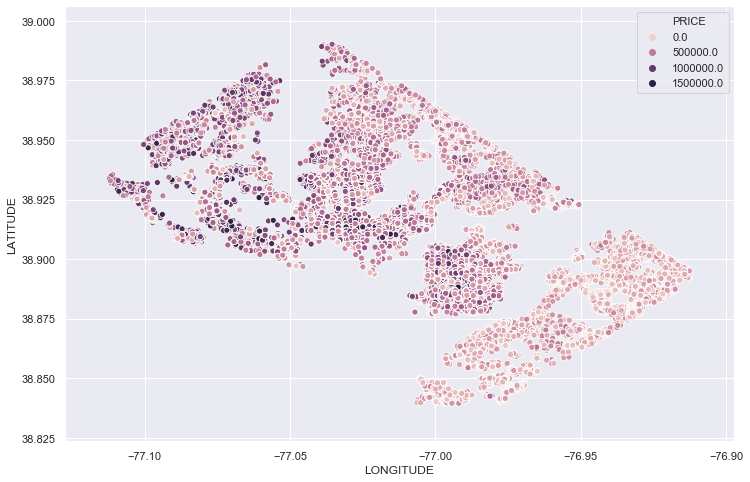

In [624]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='LONGITUDE',y='LATITUDE',data=df_out,hue='PRICE')

Plotting the longitude and lattitude allows us to view the spatial distribution of residential units by sale price. The wealthiest and poorest areas of the city are visible from left to right.

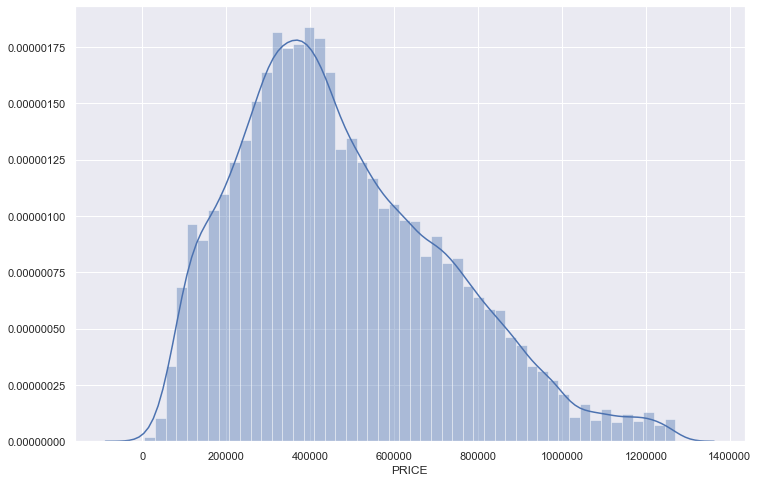

In [603]:
plt.figure(figsize=(12,8))
x = df_out['PRICE']
sns.distplot(x)

This distribution plot, along with the boxplot below, indicate the full range of sales prices in different ways.  

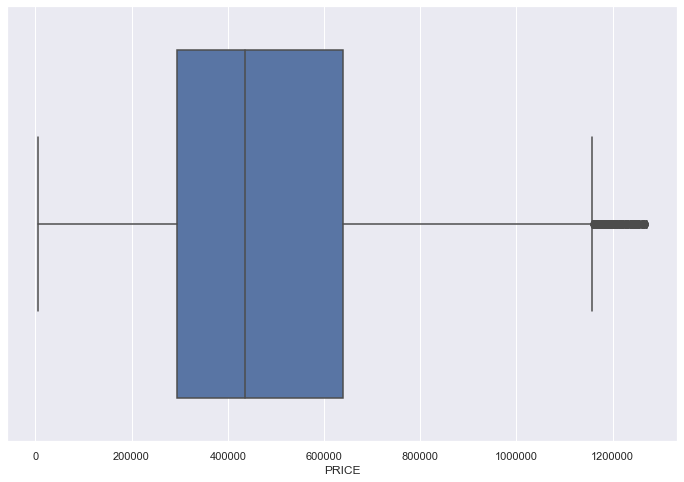

In [606]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_out['PRICE'])

This boxplot allows us to visualize the median, the 25th percentile and the 75th percentile of sales values in the data frame we are going to train. 

The large number of features means we can learn a lot about the data by building charts. I seek to confirm my hypotheses and look out for strange distributions. 

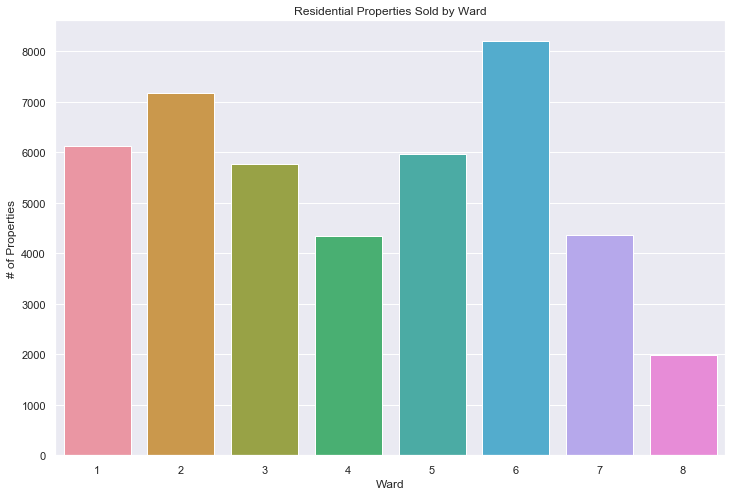

In [658]:
plt.figure(figsize=(12,8))
sns.countplot(df_out['WARD'])
plt.title('Residential Properties Sold by Ward')
plt.ylabel('# of Properties', fontsize=12)
plt.xlabel('Ward', fontsize=12)
plt.show()

Wards 4 and 6 are rapidly gentrifying areas so it makes sense that they account for a higher number of properties for sale. Meanwhile, Ward 8 is one of the most disadvantaged areas of the city. Property values and sales numbers in this ward reflect the relative desirability of other areas. 

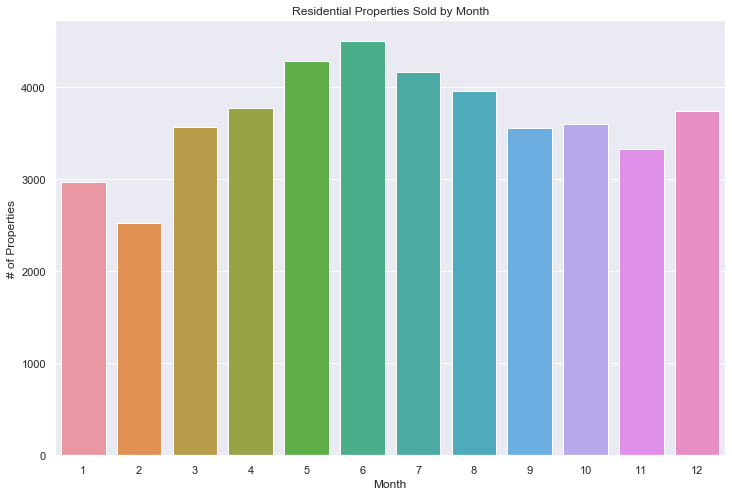

In [657]:
plt.figure(figsize=(12,8))
sns.countplot(df_out['MONTH'])
plt.title('Residential Properties Sold by Month')
plt.ylabel('# of Properties', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.show()

May, June & July are the busiest month for selling houses in Washington. January & February have the lowest sales numbers. 

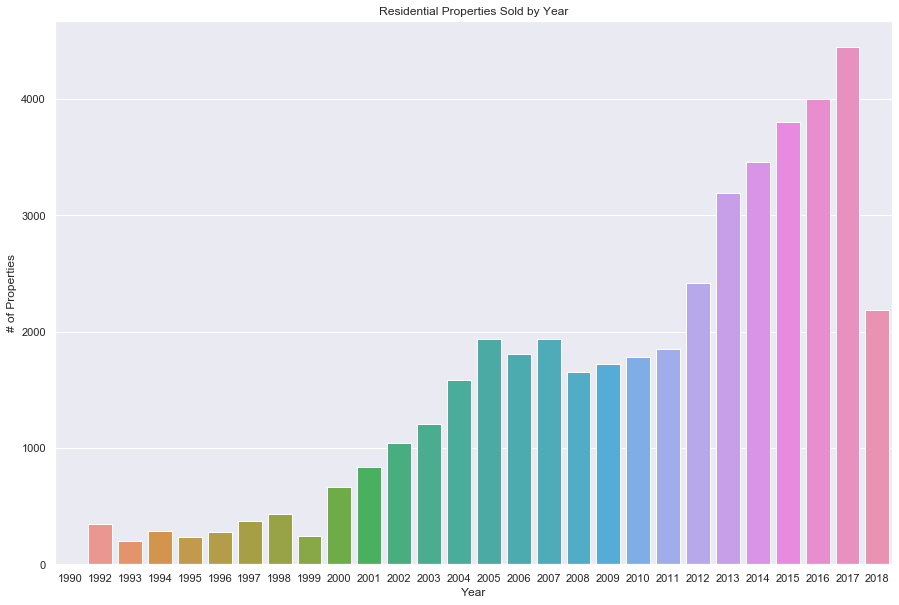

In [688]:
plt.figure(figsize=(15,10))
sns.countplot(df_out['YEAR'])
plt.title('Residential Properties Sold by Year')
plt.ylabel('# of Properties', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.show()

The number of properties sold each year in Washington is growing. The population has exploded since the year 2,000 and building new housing to meet the demand. developers are renovating the existing stock rapidly

The following plots compare price distributions across a range of categorical variables. 

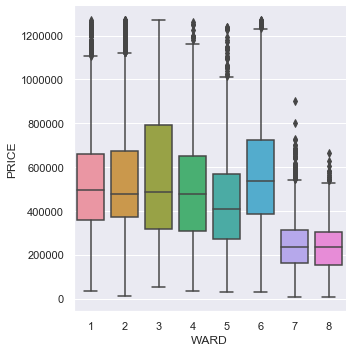

In [645]:
sns.catplot(x="WARD", y="PRICE", kind="box", data=df_out);

Property values are expectedly highest in Ward 3 (an established area) and Ward 6 (a rapidly gentrifying area). Median sales prices for properties in ward 7 and ward 8 are significantly below the average across the city. The low quality of schools, limited access to supermarkets and healthcare facilities, and the prevalence of crime, are significant factors here. 

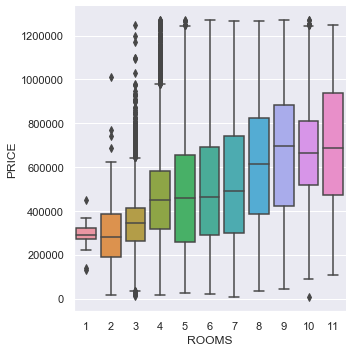

In [639]:
sns.catplot(x="ROOMS", y="PRICE", kind="box", data=df_out);

Properties with more rooms tend to be larger and should sell at a higher price. The data supports this assumption. 

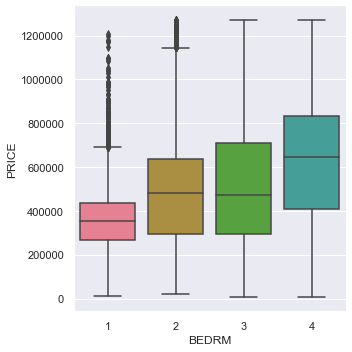

In [640]:
sns.catplot(x="BEDRM", y="PRICE", kind="box",data=df_out);

The logic holds true when we isolate bedrooms. The median value for two and three bedrooms is roughly the same, but the 75th percentile is higher for 3 bedrooms.

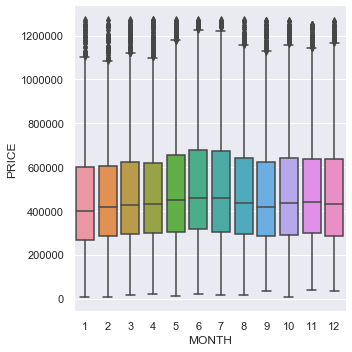

In [631]:
sns.catplot(x="MONTH", y="PRICE", kind="box", data=df_out);

In [ ]:
Sales price varies by month. Prices are highest in the summer when the competition is greatest. 

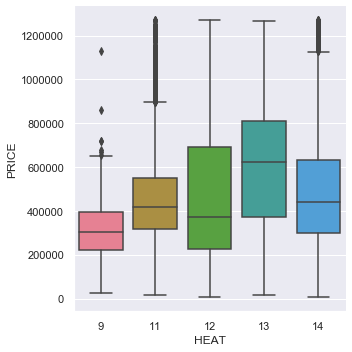

In [632]:
sns.catplot(x="HEAT", y="PRICE", kind="box", data=df_out);

In [ ]:
My domain knowledge of heating systems is limited, but it is clear that houses with system 13 (Warm Cool) typically sell at the highest price. 

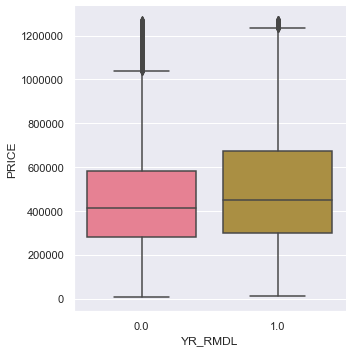

In [633]:
sns.catplot(x="YR_RMDL", y="PRICE", kind="box", data=df_out);

In [ ]:
Houses that have been remodeled at some point have a marginally higher median sale price. 

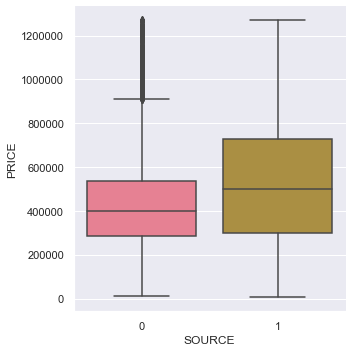

In [636]:
sns.catplot(x="SOURCE", y="PRICE", kind="box", data=df_out);

The median sale price for condos is less than the median sale price for other types of residential units. 

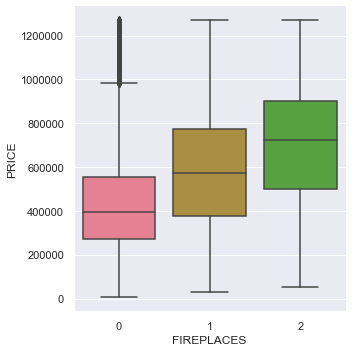

In [638]:
sns.catplot(x="FIREPLACES", y="PRICE", kind="box", data=df_out);

Residential units with fireplaces sell for more than units that don't. The number of fireplaces is a good proxy for the size of a house. The higher the number of fireplaces, the bigger the house and the higher the median sale prace.

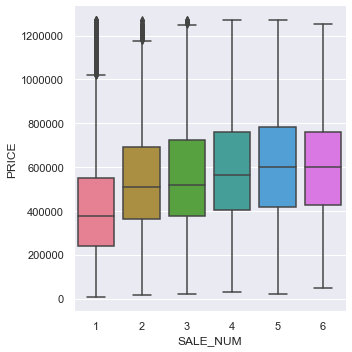

In [637]:
sns.catplot(x="SALE_NUM", y="PRICE", kind="box", data=df_out);

The number of times a house has been sold is a good indicator of a unit's popularity with buyers because of attractive fundamentals. 

Text(0.5, 0, 'NEIGHBORHOOD')

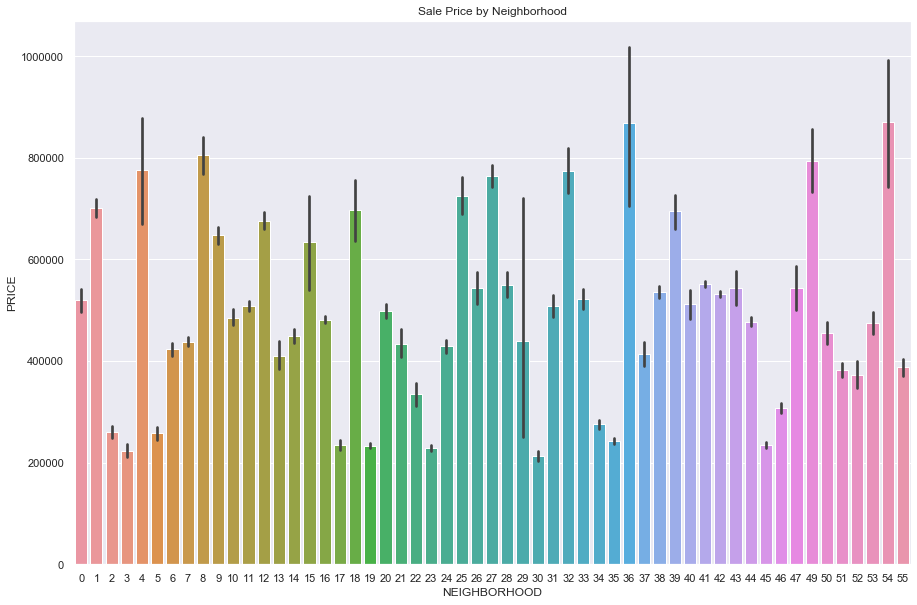

In [671]:
plt.figure(figsize=(15,10))
sns.barplot(x="ASSESSMENT_NBHD", y="PRICE",data=df_out)
plt.title('Sale Price by Neighborhood')
plt.xlabel('NEIGHBORHOOD', fontsize=12)

Average sale price varies wildly from neighborhood to neighborhood. This is evidence of extreme income inequality. Property values are soaring in some areas but are chronically low in others.

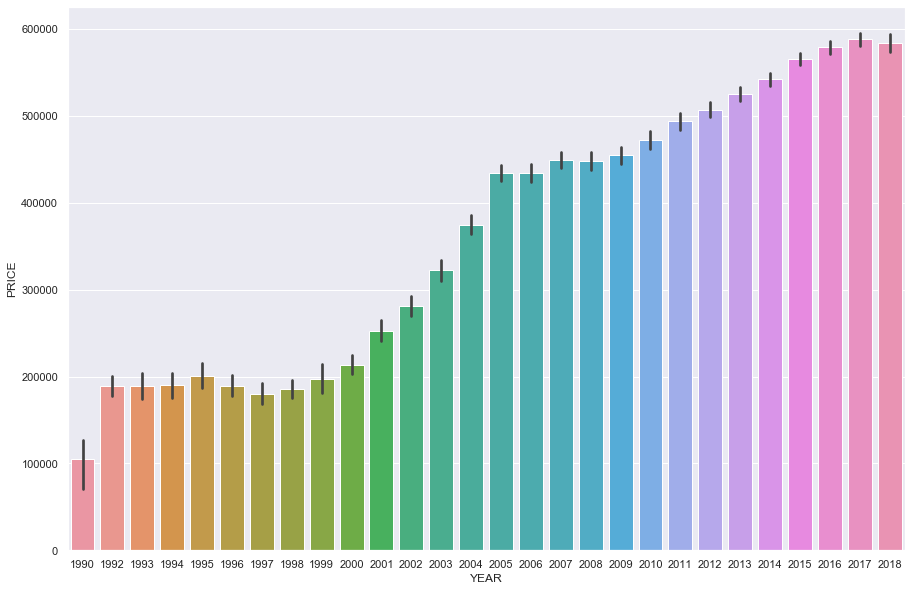

In [687]:
plt.figure(figsize=(15,10))
sns.barplot(x="YEAR", y="PRICE", data=df_out)

Average sale price has been rising fast since the year 2000. Although we expect housing proces to rise with inflation, this chart tells us that the property market is booming.

In [ ]:
The following three scatter plots show the bivariate distribution beween variables indicating year and sale tprice. 

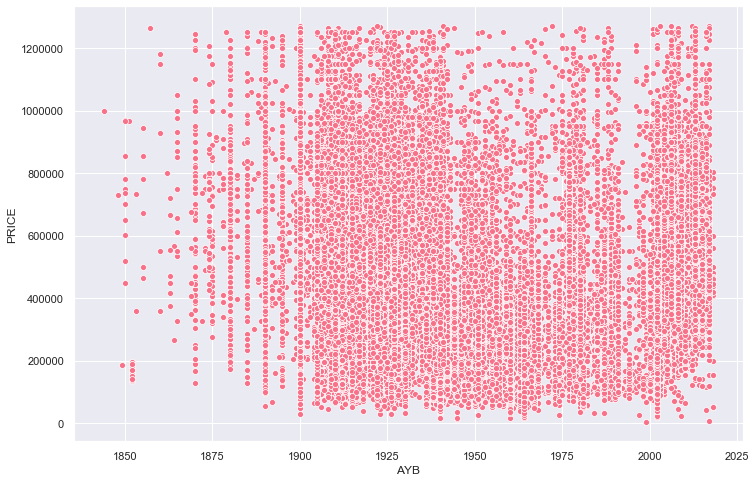

In [652]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="AYB", y="PRICE", data=df_out)

A clustering of points between 1900 and 1950 tells us that a significant amount of the city's housing stock was built during this time. However, year built does not have a strong negative or positive correlation with sale price. A list of the most expensive houses would include units built in many diffrent eras.

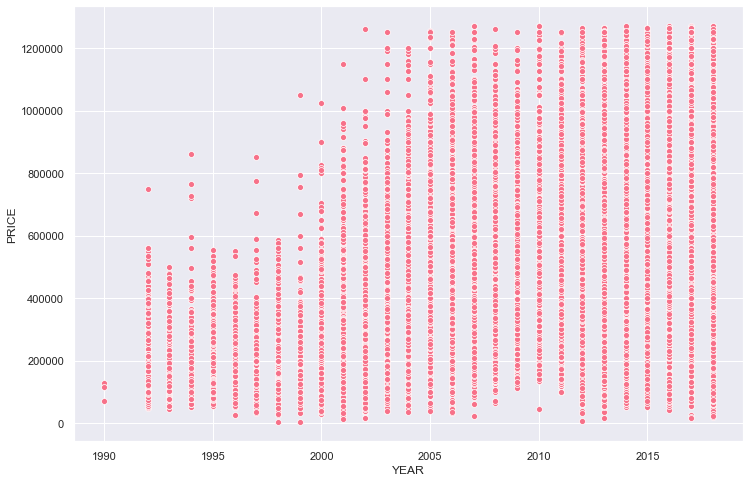

In [653]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="YEAR", y="PRICE", data=df_out)

This chart shows that the selling price of houses increased rapidly after the year 2000. There is a class of $1,000,000+ homes which are now a stable segment of the overall market. 

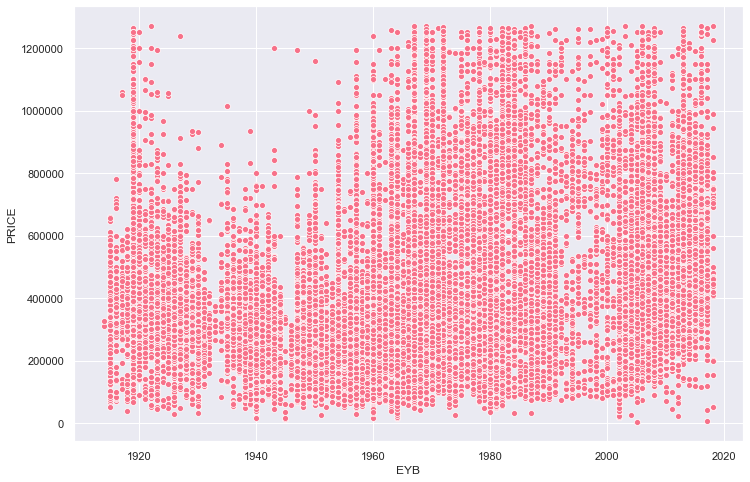

In [654]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="EYB", y="PRICE", data=df_out)

In [ ]:
Additions on the original structure tends to increase the sale price of residential units. This effect is more significant for recent modifications.

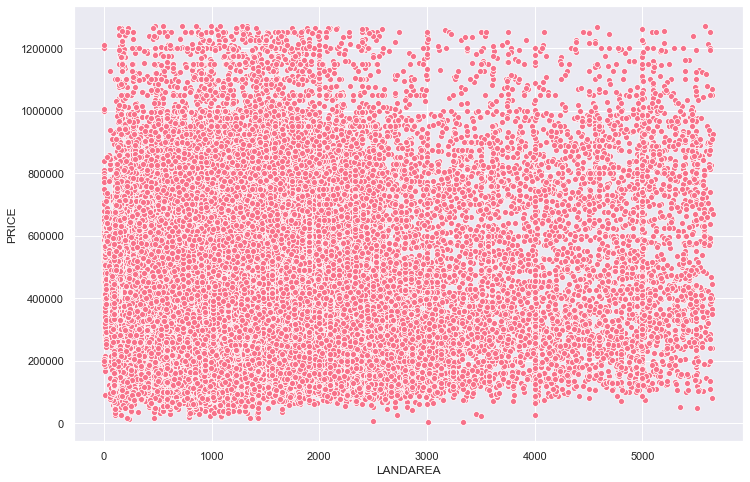

In [655]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="LANDAREA", y="PRICE", data=df_out)

This final scatter plot illustrates the peculiar situation of cities today. Units with small land area can sell for as much as units with large land areas because of the heightened demand for properties in the center of the city.

In [672]:
df_out.corr()['PRICE'].sort_values()

LONGITUDE         -0.339364
WARD              -0.255159
AYB               -0.118419
ASSESSMENT_NBHD   -0.001253
MONTH              0.015202
HEAT               0.079924
YR_RMDL            0.097851
LANDAREA           0.100427
LATITUDE           0.168740
EYB                0.177300
SOURCE             0.201673
QUADRANT           0.238010
HF_BATHRM          0.260860
SALE_NUM           0.292538
FIREPLACES         0.333232
ROOMS              0.333906
BEDRM              0.334301
YEAR               0.443849
BATHRM             0.492392
PRICE              1.000000
Name: PRICE, dtype: float64

## Train Model

In [673]:
X = df_out.drop('PRICE',axis=1)
y = df_out['PRICE']

In [548]:
df_out.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'ROOMS', 'BEDRM', 'AYB', 'YR_RMDL',
       'EYB', 'PRICE', 'QUALIFIED', 'SALE_NUM', 'FIREPLACES', 'LANDAREA',
       'SOURCE', 'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'WARD',
       'QUADRANT', 'MONTH', 'YEAR'],
      dtype='object')

In [674]:
from sklearn.model_selection import train_test_split

In [675]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [676]:
from sklearn.preprocessing import MinMaxScaler

In [677]:
scaler = MinMaxScaler()

In [678]:
X_train= scaler.fit_transform(X_train)

In [679]:
X_test = scaler.transform(X_test)

In [680]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [683]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [685]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=500)


Train on 30747 samples, validate on 13178 samples
Epoch 1/500
30747/30747 [==============================] - 2s 70us/sample - loss: 10797432549.7481 - val_loss: 11105998738.4356
Epoch 2/500
30747/30747 [==============================] - 2s 70us/sample - loss: 10813032567.6948 - val_loss: 11068449318.6195
Epoch 3/500
30747/30747 [==============================] - 2s 74us/sample - loss: 10798017003.3182 - val_loss: 11208633462.1120
Epoch 4/500
30747/30747 [==============================] - 3s 84us/sample - loss: 10785341818.5340 - val_loss: 11356139292.1682
Epoch 5/500
30747/30747 [==============================] - 3s 83us/sample - loss: 10776375124.3509 - val_loss: 11042763609.7107
Epoch 6/500
30747/30747 [==============================] - 3s 84us/sample - loss: 10770707764.7620 - val_loss: 11059867507.5089
Epoch 7/500
30747/30747 [==============================] - 2s 79us/sample - loss: 10753834408.5269 - val_loss: 10992932348.8141
Epoch 8/500
30747/30747 [=============================

30747/30747 [==============================] - 3s 88us/sample - loss: 10399701467.7152 - val_loss: 10635406798.3463
Epoch 65/500
30747/30747 [==============================] - 3s 88us/sample - loss: 10384956451.2690 - val_loss: 10603840344.7783
Epoch 66/500
30747/30747 [==============================] - 3s 89us/sample - loss: 10397654991.4427 - val_loss: 10726771111.0275
Epoch 67/500
30747/30747 [==============================] - 2s 80us/sample - loss: 10377601294.5622 - val_loss: 10605937316.9683
Epoch 68/500
30747/30747 [==============================] - 3s 85us/sample - loss: 10415768356.4596 - val_loss: 10733701007.0165
Epoch 69/500
30747/30747 [==============================] - 3s 89us/sample - loss: 10380460012.0842 - val_loss: 10627157375.5532
Epoch 70/500
30747/30747 [==============================] - 2s 76us/sample - loss: 10368519799.5449 - val_loss: 10658032359.1732
Epoch 71/500
30747/30747 [==============================] - 2s 75us/sample - loss: 10373043672.0185 - val_loss

30747/30747 [==============================] - 3s 87us/sample - loss: 9963195817.8590 - val_loss: 10227745048.5160
Epoch 128/500
30747/30747 [==============================] - 3s 88us/sample - loss: 9963768927.3162 - val_loss: 10197415830.3208
Epoch 129/500
30747/30747 [==============================] - 2s 79us/sample - loss: 9943078562.9568 - val_loss: 10206079368.4116
Epoch 130/500
30747/30747 [==============================] - 2s 73us/sample - loss: 9943317993.5697 - val_loss: 10284925830.7798
Epoch 131/500
30747/30747 [==============================] - 2s 76us/sample - loss: 9923647952.1088 - val_loss: 10125620148.1597
Epoch 132/500
30747/30747 [==============================] - 2s 78us/sample - loss: 9898880305.7313 - val_loss: 10193103607.6467
Epoch 133/500
30747/30747 [==============================] - 2s 77us/sample - loss: 9898601327.1939 - val_loss: 10131981317.5948
Epoch 134/500
30747/30747 [==============================] - 2s 75us/sample - loss: 9885965138.8522 - val_loss:

Epoch 191/500
30747/30747 [==============================] - 2s 71us/sample - loss: 9212514609.9311 - val_loss: 9670058346.2620
Epoch 192/500
30747/30747 [==============================] - 3s 85us/sample - loss: 9195389031.3092 - val_loss: 9519395122.1587
Epoch 193/500
30747/30747 [==============================] - 3s 84us/sample - loss: 9211277993.8674 - val_loss: 9540773060.7497
Epoch 194/500
30747/30747 [==============================] - 3s 84us/sample - loss: 9154984815.5936 - val_loss: 9749578205.5766
Epoch 195/500
30747/30747 [==============================] - 2s 80us/sample - loss: 9180353841.8312 - val_loss: 9600278586.7452
Epoch 196/500
30747/30747 [==============================] - 2s 81us/sample - loss: 9167785965.8826 - val_loss: 9542079076.4729
Epoch 197/500
30747/30747 [==============================] - 3s 82us/sample - loss: 9156290432.8451 - val_loss: 9462858561.4667
Epoch 198/500
30747/30747 [==============================] - 2s 76us/sample - loss: 9141017362.4505 - va

30747/30747 [==============================] - 3s 87us/sample - loss: 8595328028.2085 - val_loss: 9467895660.9816
Epoch 256/500
30747/30747 [==============================] - 2s 80us/sample - loss: 8599481142.0775 - val_loss: 9355983508.4948
Epoch 257/500
30747/30747 [==============================] - 2s 80us/sample - loss: 8599003580.3095 - val_loss: 8976084684.4426
Epoch 258/500
30747/30747 [==============================] - 2s 79us/sample - loss: 8580489641.3095 - val_loss: 8963441139.4895
Epoch 259/500
30747/30747 [==============================] - 2s 78us/sample - loss: 8555534692.7531 - val_loss: 8946130516.6210
Epoch 260/500
30747/30747 [==============================] - 2s 78us/sample - loss: 8560427552.0219 - val_loss: 8969627395.9241
Epoch 261/500
30747/30747 [==============================] - 2s 80us/sample - loss: 8551127367.9118 - val_loss: 8952301688.7540
Epoch 262/500
30747/30747 [==============================] - 3s 82us/sample - loss: 8576554670.4633 - val_loss: 894363

30747/30747 [==============================] - 2s 72us/sample - loss: 8243138852.1765 - val_loss: 8743419382.4423
Epoch 320/500
30747/30747 [==============================] - 2s 71us/sample - loss: 8241888116.4060 - val_loss: 8757399826.4550
Epoch 321/500
30747/30747 [==============================] - 2s 69us/sample - loss: 8261700060.0483 - val_loss: 8776136953.4339
Epoch 322/500
30747/30747 [==============================] - 2s 69us/sample - loss: 8252405041.8479 - val_loss: 8772787223.4670
Epoch 323/500
30747/30747 [==============================] - 2s 70us/sample - loss: 8261213784.2058 - val_loss: 8681648233.3683
Epoch 324/500
30747/30747 [==============================] - 2s 68us/sample - loss: 8236494093.4632 - val_loss: 8718419675.6728
Epoch 325/500
30747/30747 [==============================] - 2s 68us/sample - loss: 8242656014.5455 - val_loss: 8710294683.7214
Epoch 326/500
30747/30747 [==============================] - 2s 68us/sample - loss: 8223033329.4794 - val_loss: 867906

30747/30747 [==============================] - 2s 74us/sample - loss: 8121621103.9016 - val_loss: 8639491991.0979
Epoch 384/500
30747/30747 [==============================] - 3s 85us/sample - loss: 8108365608.4644 - val_loss: 9321808196.8080
Epoch 385/500
30747/30747 [==============================] - 2s 78us/sample - loss: 8126796661.6716 - val_loss: 8598778657.6075
Epoch 386/500
30747/30747 [==============================] - 2s 80us/sample - loss: 8118819858.9500 - val_loss: 8558433631.3832
Epoch 387/500
30747/30747 [==============================] - 3s 82us/sample - loss: 8066632592.2649 - val_loss: 8724953728.6022
Epoch 388/500
30747/30747 [==============================] - 2s 79us/sample - loss: 8081798674.2839 - val_loss: 8627213712.0267
Epoch 389/500
30747/30747 [==============================] - 2s 78us/sample - loss: 8091245272.0601 - val_loss: 8606239671.7341
Epoch 390/500
30747/30747 [==============================] - 3s 86us/sample - loss: 8102534686.6897 - val_loss: 862774

30747/30747 [==============================] - 2s 73us/sample - loss: 8011155974.2778 - val_loss: 8563621658.6141
Epoch 448/500
30747/30747 [==============================] - 2s 73us/sample - loss: 7999073131.0975 - val_loss: 8540293995.8938
Epoch 449/500
30747/30747 [==============================] - 3s 87us/sample - loss: 8000425461.3427 - val_loss: 8522254447.4294
Epoch 450/500
30747/30747 [==============================] - 3s 86us/sample - loss: 8005935638.1472 - val_loss: 8566336582.5564
Epoch 451/500
30747/30747 [==============================] - 3s 84us/sample - loss: 7992130662.8096 - val_loss: 8519771932.1682
Epoch 452/500
30747/30747 [==============================] - 2s 75us/sample - loss: 8007170926.5029 - val_loss: 8525864133.2160
Epoch 453/500
30747/30747 [==============================] - 3s 87us/sample - loss: 7998778269.1202 - val_loss: 8528830081.6901
Epoch 454/500
30747/30747 [==============================] - 3s 83us/sample - loss: 8008040711.9014 - val_loss: 854001

## Evaluate Model Performance

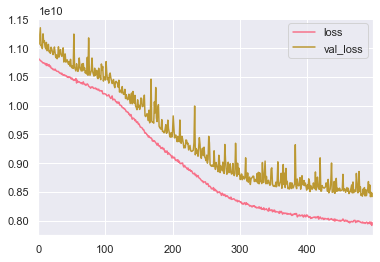

In [690]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [691]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [692]:
X_test

array([[0.5       , 0.        , 1.        , ..., 0.5       , 0.27272727,
        0.92857143],
       [0.5       , 0.5       , 1.        , ..., 0.5       , 0.63636364,
        0.53571429],
       [0.5       , 0.        , 1.        , ..., 0.        , 0.81818182,
        0.96428571],
       ...,
       [0.        , 0.5       , 0.4       , ..., 1.        , 0.72727273,
        0.60714286],
       [0.5       , 0.        , 0.6       , ..., 1.        , 0.18181818,
        0.64285714],
       [0.        , 0.        , 1.        , ..., 1.        , 0.27272727,
        0.89285714]])

In [693]:
predictions = model.predict(X_test)

In [694]:
mean_absolute_error(y_test,predictions)

64589.87616138166

In [695]:
np.sqrt(mean_squared_error(y_test,predictions))

91761.05926256604

In [696]:
explained_variance_score(y_test,predictions)

0.865274728517222

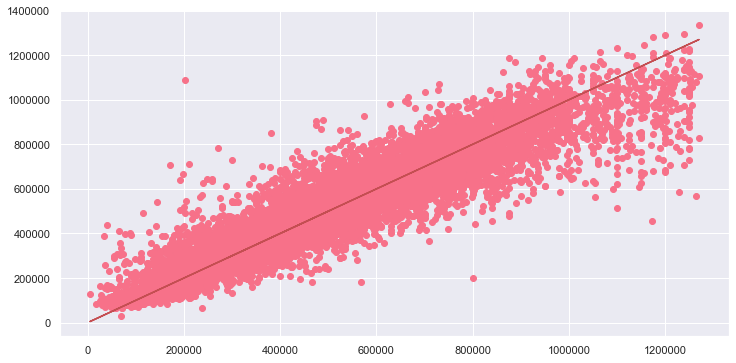

In [699]:
# Our predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [700]:
errors = y_test.values.reshape(13178, 1) - predictions

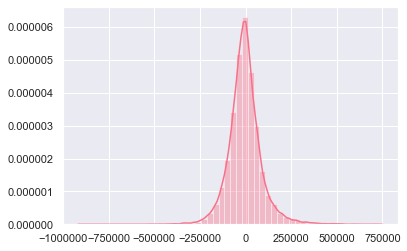

In [702]:
sns.distplot(errors)

### The Second Approach

In [705]:
df2 = pd.read_csv('DC_Properties.csv')

In [706]:
df2.columns

Index(['INDEX', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [707]:
df2.dropna(how='any', subset=['PRICE'], inplace=True)

In [708]:
df2 = df2.drop('BLDG_NUM',axis=1)
df2 = df2.drop('INDEX',axis=1)
df2 = df2.drop('USECODE',axis=1)
df2 = df2.drop('GIS_LAST_MOD_DTTM',axis=1)
df2 = df2.drop('CMPLX_NUM',axis=1)
df2 = df2.drop('LIVING_GBA',axis=1)
df2 = df2.drop('FULLADDRESS',axis=1)
df2 = df2.drop('CITY',axis=1)
df2 = df2.drop('STATE',axis=1)
df2 = df2.drop('ZIPCODE',axis=1)
df2 = df2.drop('NATIONALGRID',axis=1)
df2 = df2.drop('ASSESSMENT_SUBNBHD',axis=1)
df2 = df2.drop('CENSUS_TRACT',axis=1)
df2 = df2.drop('CENSUS_BLOCK',axis=1)
df2 = df2.drop('SQUARE',axis=1)
df2 = df2.drop('Y',axis=1)
df2 = df2.drop('X',axis=1)

In [709]:
df2.isnull().sum()

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
NUM_UNITS          40316
ROOMS                  0
BEDRM                  0
AYB                  112
YR_RMDL            40542
EYB                    0
STORIES            40349
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
GBA                40316
STYLE              40316
STRUCT             40316
GRADE              40316
CNDTN              40316
EXTWALL            40316
ROOF               40316
INTWALL            40316
KITCHENS           40317
FIREPLACES             0
LANDAREA               0
SOURCE                 0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
WARD                   0
QUADRANT             101
dtype: int64

In [710]:
df2.dropna(how='any', subset=['NUM_UNITS'], inplace=True)
df2.dropna(how='any', subset=['STORIES'], inplace=True)
df2.dropna(how='any', subset=['GBA'], inplace=True)
df2.dropna(how='any', subset=['STYLE'], inplace=True)
df2.dropna(how='any', subset=['STRUCT'], inplace=True)
df2.dropna(how='any', subset=['GRADE'], inplace=True)
df2.dropna(how='any', subset=['CNDTN'], inplace=True)
df2.dropna(how='any', subset=['EXTWALL'], inplace=True)
df2.dropna(how='any', subset=['ROOF'], inplace=True)
df2.dropna(how='any', subset=['INTWALL'], inplace=True)
df2.dropna(how='any', subset=['KITCHENS'], inplace=True)

In [711]:
df2.isnull().sum()

BATHRM                 0
HF_BATHRM              0
HEAT                   0
AC                     0
NUM_UNITS              0
ROOMS                  0
BEDRM                  0
AYB                   95
YR_RMDL            24653
EYB                    0
STORIES                0
SALEDATE               1
PRICE                  0
QUALIFIED              0
SALE_NUM               0
GBA                    0
STYLE                  0
STRUCT                 0
GRADE                  0
CNDTN                  0
EXTWALL                0
ROOF                   0
INTWALL                0
KITCHENS               0
FIREPLACES             0
LANDAREA               0
SOURCE                 0
LATITUDE               0
LONGITUDE              0
ASSESSMENT_NBHD        0
WARD                   0
QUADRANT             101
dtype: int64

In [712]:
df2['YR_RMDL'].fillna(0, inplace=True)

In [713]:
df2['YR_RMDL'].loc[(df2['YR_RMDL'] > 0)] = 1

In [714]:
df2['YR_RMDL'].value_counts()

1.0    33213
0.0    24653
Name: YR_RMDL, dtype: int64

In [715]:
df2.dropna(how='any', subset=['AYB'], inplace=True)
df2.dropna(how='any', subset=['QUADRANT'], inplace=True)
df2.dropna(how='any', subset=['SALEDATE'], inplace=True)

In [716]:
df2.isnull().sum()

BATHRM             0
HF_BATHRM          0
HEAT               0
AC                 0
NUM_UNITS          0
ROOMS              0
BEDRM              0
AYB                0
YR_RMDL            0
EYB                0
STORIES            0
SALEDATE           0
PRICE              0
QUALIFIED          0
SALE_NUM           0
GBA                0
STYLE              0
STRUCT             0
GRADE              0
CNDTN              0
EXTWALL            0
ROOF               0
INTWALL            0
KITCHENS           0
FIREPLACES         0
LANDAREA           0
SOURCE             0
LATITUDE           0
LONGITUDE          0
ASSESSMENT_NBHD    0
WARD               0
QUADRANT           0
dtype: int64

In [717]:
df2.describe

<bound method NDFrame.describe of         BATHRM  HF_BATHRM           HEAT AC  NUM_UNITS  ROOMS  BEDRM     AYB  \
0            4          0      Warm Cool  Y        2.0      8      4  1910.0   
2            3          1  Hot Water Rad  Y        2.0      9      5  1910.0   
3            3          1  Hot Water Rad  Y        2.0      8      5  1900.0   
5            3          2  Hot Water Rad  Y        1.0     10      5  1913.0   
7            3          1  Hot Water Rad  Y        2.0      8      4  1906.0   
...        ...        ...            ... ..        ...    ...    ...     ...   
106687       2          0     Forced Air  N        2.0     10      4  1953.0   
106688       2          0     Forced Air  Y        2.0     10      4  1953.0   
106692       2          0     Forced Air  N        2.0     10      5  1953.0   
106694       2          0     Forced Air  N        2.0     10      4  1953.0   
106695       2          0     Forced Air  Y        2.0     10      4  1953.0   

     

### Encode Categorical Variables

In [718]:
df2['HEAT'] = df2['HEAT'].astype('category')
df2['AC'] = df2['AC'].astype('category') 
df2['QUALIFIED'] = df['QUALIFIED'].astype('category')
df2['SOURCE'] = df2['SOURCE'].astype('category')  
df2['ASSESSMENT_NBHD'] = df['ASSESSMENT_NBHD'].astype('category')
df2['WARD'] = df2['WARD'].astype('category')  
df2['QUADRANT'] = df2['QUADRANT'].astype('category')

In [719]:
heat_type2 = {'HEAT': {'No Data': 0, 'Air Exchng': 1, 'Evp Cool': 2, 'Ind Unit': 3,
                                  'Gravity Furnac': 4, 'Air-Oil': 5, 'Electric Rad': 6 ,'Elec Base Brd':7, 
                                  'Water Base Brd': 8 , 'Wall Furnace': 9,'Ht Pump': 10,
                                  'Ht Pump': 11,'Warm Cool': 12,'Hot Water Rad': 13,'Forced Air': 14}}
df2.replace(heat_type2, inplace=True)

In [720]:
df2 = df2[df2.AC != '0']

In [721]:
AC_type = {'AC': {'N': 0, 'Y': 1}}

In [722]:
df2.replace(AC_type, inplace=True)

In [723]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 


In [724]:
df2['QUALIFIED']= le.fit_transform(df2['QUALIFIED']) 

In [725]:
df2['QUALIFIED'].value_counts()

1    45703
0    11951
Name: QUALIFIED, dtype: int64

In [726]:
df2['ASSESSMENT_NBHD']= le.fit_transform(df2['ASSESSMENT_NBHD']) 

In [727]:
df2['SOURCE'].value_counts()

Residential    57654
Name: SOURCE, dtype: int64

In [728]:
df2 = df2.drop('SOURCE',axis=1)

In [729]:
ward_number = {'WARD': {'Ward 1': 1, 'Ward 2': 2, 'Ward 3': 3, 'Ward 4': 4,
                                  'Ward 5': 5, 'Ward 6': 6, 'Ward 7': 7 ,'Ward 8': 8}}
df2.replace(ward_number, inplace=True)

In [730]:
quadrant = {'QUADRANT': {'SW': 1, 'SE': 2, 'NE': 3, 'NW': 4}}
df2.replace(quadrant, inplace=True)

In [731]:
df2['SALEDATE'] = pd.to_datetime(df2['SALEDATE'])

In [732]:
df2['MONTH'] = df2['SALEDATE'].apply(lambda date:date.month)

In [733]:
df2['YEAR'] = df2['SALEDATE'].apply(lambda date:date.year)

In [734]:
df2 = df2.drop('SALEDATE',axis=1)

Now I need to deal with the new features. 

In [735]:
df2['NUM_UNITS'].value_counts()

1.0    49130
2.0     6037
4.0     1851
3.0      587
0.0       42
5.0        4
6.0        3
Name: NUM_UNITS, dtype: int64

In [736]:
df2['STORIES'].value_counts()

2.0      45894
3.0       9090
1.0       2310
4.0        310
9.0         15
0.0         11
5.0          9
6.0          5
25.0         4
275.0        2
826.0        1
250.0        1
20.0         1
8.0          1
Name: STORIES, dtype: int64

In [737]:
df2['GBA'].value_counts()

1152.0    833
1088.0    758
1024.0    674
832.0     665
1280.0    574
         ... 
4047.0      1
3700.0      1
5424.0      1
6535.0      1
4933.0      1
Name: GBA, Length: 4011, dtype: int64

In [738]:
df2['STYLE'].value_counts()

2 Story            43981
3 Story             5571
2.5 Story Fin       3905
1 Story             1983
1.5 Story Fin       1147
2.5 Story Unfin      376
4 Story              231
Split Level          158
Split Foyer          123
3.5 Story Fin         83
1.5 Story Unfin       53
Default               21
Bi-Level               8
3.5 Story Unfin        5
4.5 Story Fin          5
Vacant                 2
4.5 Story Unfin        2
Name: STYLE, dtype: int64

In [739]:
df2['STYLE']= le.fit_transform(df2['STYLE']) 

In [740]:
df2['STRUCT'].value_counts()

Row Inside       23379
Single           16110
Semi-Detached     8192
Row End           6882
Multi             2829
Town Inside        183
Town End            75
Default              4
Name: STRUCT, dtype: int64

In [741]:
df2['STRUCT']= le.fit_transform(df2['STRUCT']) 

In [742]:
df2['GRADE'].value_counts()

Average          19576
Above Average    17229
Good Quality     11714
Very Good         4997
Excellent         1818
Superior          1520
Exceptional-A      472
Exceptional-B      168
Fair Quality        82
Exceptional-C       44
Exceptional-D       32
Low Quality          2
Name: GRADE, dtype: int64

In [743]:
grade = {'GRADE': {'Low Quality': 0, 'Exceptional-D': 1, 'Exceptional-C': 2, 'Exceptional-B': 3, 
                   'Exceptional-A': 4, 'Fair Quality': 5, 'Average': 6, 'Above Average': 7, 'Good Quality': 8, 
                   'Very Good': 9, 'Excellent': 10, 'Superior': 11}}

In [744]:
df2.replace(grade, inplace=True)

In [745]:
df2['CNDTN'].value_counts()

Good         25588
Average      23934
Very Good     6655
Excellent      881
Fair           505
Poor            90
Default          1
Name: CNDTN, dtype: int64

In [746]:
condition = {'CNDTN': {'Default': 0, 'Poor': 1, 'Fair': 2, 'Average': 3, 
                   'Good': 4, 'Very Good': 5, 'Excellent': 6}}

In [747]:
df2.replace(condition, inplace=True)

In [748]:
df2['EXTWALL'].value_counts()

Common Brick      43230
Brick/Siding       3504
Vinyl Siding       3139
Wood Siding        2264
Stucco             1646
Brick Veneer        585
Shingle             528
Aluminum            454
Face Brick          419
Brick/Stucco        397
Brick/Stone         382
Stone               370
Stone/Siding        212
Stone/Stucco        155
Stone Veneer        147
Hardboard            77
Concrete             40
Concrete Block       35
Metal Siding         28
Stucco Block         28
Default               8
Plywood               4
Adobe                 1
SPlaster              1
Name: EXTWALL, dtype: int64

In [749]:
df2['EXTWALL']= le.fit_transform(df2['EXTWALL']) 

In [750]:
df2['ROOF'].value_counts()

Built Up          17578
Metal- Sms        16305
Comp Shingle      16064
Slate              5552
Neopren             900
Shake               380
Clay Tile           309
Shingle             247
Metal- Pre          137
Typical              81
Composition Ro       61
Metal- Cpr           20
Concrete Tile        11
Wood- FS              4
Water Proof           4
Concrete              1
Name: ROOF, dtype: int64

In [751]:
df2['ROOF']= le.fit_transform(df2['ROOF']) 

In [752]:
df2['INTWALL'].value_counts()

Hardwood         44016
Hardwood/Carp     7468
Wood Floor        3997
Carpet            2001
Lt Concrete         49
Ceramic Tile        39
Default             33
Vinyl Comp          21
Parquet             11
Vinyl Sheet          8
Resiliant            8
Terrazo              3
Name: INTWALL, dtype: int64

In [753]:
df2['INTWALL']= le.fit_transform(df2['INTWALL']) 

In [754]:
df2['KITCHENS'].value_counts()

1.0     47495
2.0      7640
4.0      1848
3.0       625
0.0        37
6.0         4
5.0         4
44.0        1
Name: KITCHENS, dtype: int64

In [755]:
df['HEAT'] = df['HEAT'].astype('category')
df['AC'] = df['AC'].astype('category') 
df['QUALIFIED'] = df['QUALIFIED'].astype('category')
df['SOURCE'] = df['SOURCE'].astype('category')  
df['ASSESSMENT_NBHD'] = df['ASSESSMENT_NBHD'].astype('category')
df['WARD'] = df['WARD'].astype('category')  
df['QUADRANT'] = df['QUADRANT'].astype('category')

In [756]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57654 entries, 0 to 106695
Data columns (total 32 columns):
BATHRM             57654 non-null int64
HF_BATHRM          57654 non-null int64
HEAT               57654 non-null int64
AC                 57654 non-null int64
NUM_UNITS          57654 non-null float64
ROOMS              57654 non-null int64
BEDRM              57654 non-null int64
AYB                57654 non-null float64
YR_RMDL            57654 non-null float64
EYB                57654 non-null int64
STORIES            57654 non-null float64
PRICE              57654 non-null float64
QUALIFIED          57654 non-null int64
SALE_NUM           57654 non-null int64
GBA                57654 non-null float64
STYLE              57654 non-null int64
STRUCT             57654 non-null int64
GRADE              57654 non-null int64
CNDTN              57654 non-null int64
EXTWALL            57654 non-null int64
ROOF               57654 non-null int64
INTWALL            57654 non-null int6

## Optimize Features with IQR

In [757]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR2 = Q3 - Q1

In [758]:
df2_out = df2[~((df2 < (Q1 - 1.5 * IQR2)) |(df2 > (Q3 + 1.5 * IQR2))).any(axis=1)]

In [759]:
print(df2_out.shape)

(16217, 32)


## Train Model

In [760]:
X = df2_out.drop('PRICE',axis=1)
y = df2_out['PRICE']

In [761]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [762]:
from sklearn.preprocessing import MinMaxScaler

In [763]:
scaler = MinMaxScaler()

In [764]:
X_train= scaler.fit_transform(X_train)

In [765]:
X_test = scaler.transform(X_test)

In [766]:
df2_out.info

<bound method DataFrame.info of         BATHRM  HF_BATHRM  HEAT  AC  NUM_UNITS  ROOMS  BEDRM     AYB  YR_RMDL  \
16           3          1    12   1        1.0      8      3  1908.0      1.0   
22           1          0    14   1        1.0      6      3  1880.0      1.0   
23           2          1    14   1        1.0      5      3  1880.0      1.0   
24           2          1    13   1        1.0      8      3  1880.0      1.0   
72           4          2    12   1        1.0      8      3  1907.0      1.0   
...        ...        ...   ...  ..        ...    ...    ...     ...      ...   
106609       1          1    12   1        1.0      5      2  1950.0      0.0   
106632       1          1    12   1        1.0      7      3  1980.0      1.0   
106653       1          0    14   1        1.0      4      2  1911.0      1.0   
106656       2          1    13   1        1.0      4      3  1911.0      1.0   
106657       2          1    13   1        1.0      7      3  1911.0      1.0

In [767]:
model2 = Sequential()

model2.add(Dense(31,activation='relu'))
model2.add(Dense(31,activation='relu'))
model2.add(Dense(31,activation='relu'))
model2.add(Dense(31,activation='relu'))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')

In [768]:
model2.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=34,epochs=500)

Train on 11351 samples, validate on 4866 samples
Epoch 1/500
11351/11351 [==============================] - 1s 120us/sample - loss: 260333744677.2126 - val_loss: 76213071661.5602
Epoch 2/500
11351/11351 [==============================] - 1s 71us/sample - loss: 57808704886.6517 - val_loss: 52931742865.2035
Epoch 3/500
11351/11351 [==============================] - 1s 73us/sample - loss: 49985822219.1412 - val_loss: 45822014971.1599
Epoch 4/500
11351/11351 [==============================] - 1s 87us/sample - loss: 43027354741.7271 - val_loss: 39120076358.0764
Epoch 5/500
11351/11351 [==============================] - 1s 82us/sample - loss: 36451506965.7186 - val_loss: 33339950633.8775
Epoch 6/500
11351/11351 [==============================] - 1s 73us/sample - loss: 30931227338.8424 - val_loss: 28497701260.0477
Epoch 7/500
11351/11351 [==============================] - 1s 84us/sample - loss: 27184898221.2076 - val_loss: 25755366432.8286
Epoch 8/500
11351/11351 [============================

 3366/11351 [=======>......................] - ETA: 0s - loss: 11398120582.4646

KeyboardInterrupt: 

## Evaluate Model Performance

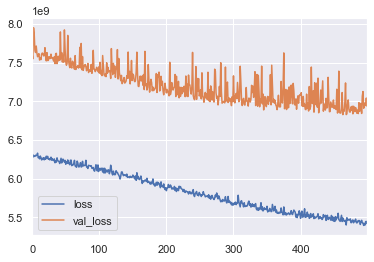

In [481]:
losses2 = pd.DataFrame(model2.history.history)
losses2.plot()

In [425]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [482]:
predictions2 = model2.predict(X_test)

In [483]:
np.sqrt(mean_squared_error(y_test,predictions2))

83295.79234773501

In [484]:
explained_variance_score(y_test,predictions2)

0.9183642760019757

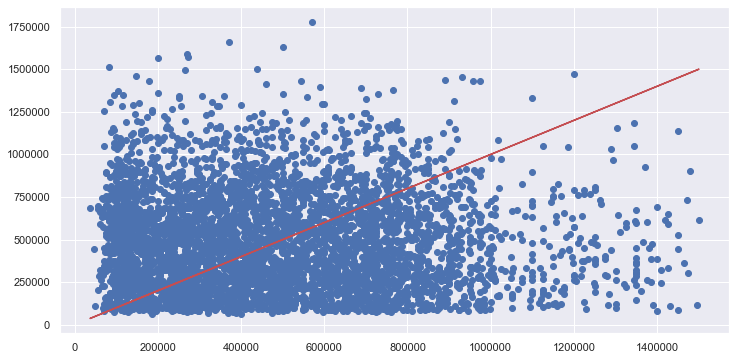

In [770]:
# Our predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions2)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [462]:
errors2 = y_test.values.reshape(4866, 1) - predictions2

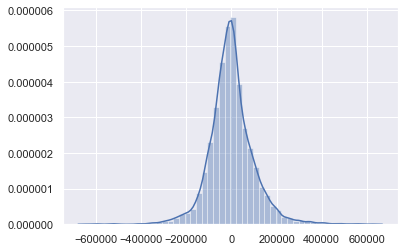

In [464]:
sns.distplot(errors2)